*   Nama: Anthony Kevin Oktavius
*   Asal: Jakarta
*   Institusi saat ini: Universitas Bina Nusantara
*   Tanggal lahir: 11 Oktober 2000
*   email: programist851@gmail.com

In [ ]:
import tensorflow as tf
print(tf.__version__)

!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

2.3.0
--2020-09-25 06:43:43--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.07MB/s    in 48s     

2020-09-25 06:44:32 (6.45 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile
import shutil
import os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

rps_cv_image_dir = "/tmp/rockpaperscissors/rps-cv-images"
mac_os_x_dir = "/tmp/__MACOSX"
saved_model_dir = "/tmp/saved_model"
def remove_directory(path):
  try:
    shutil.rmtree(path)
    print("Sucessfully delete path {}".format(path))
  except FileNotFoundError as error:
    print("Error (directory: {}): {}".format(path, error))
    print("Probably the directory has been deleted!")

def add_directory(path):
  try:
    os.mkdir(saved_model_dir)
    print("Successfully created directory: {}".format(path))
  except FileExistsError as error:
    print("Error (directory: {}): {}".format(path, error))
    print("Probably the directory has been added!")

remove_directory(rps_cv_image_dir)
remove_directory(mac_os_x_dir)
add_directory(saved_model_dir)
print("Successfully extract files!")

Sucessfully delete path /tmp/rockpaperscissors/rps-cv-images
Sucessfully delete path /tmp/__MACOSX
Successfully created directory: /tmp/saved_model
Successfully extract files!


Please wait...
(200, 200)


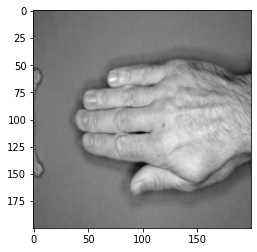

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
print("Please wait...")
sample_path = "/tmp/rockpaperscissors/paper/AtfMvZ19yfJJZapD.png"
sample_save_path = "/tmp/sample.png"
img = cv2.imread(sample_path)
img = cv2.resize(img, (200, 200))

converted_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grayscaled_image = cv2.cvtColor(converted_image, cv2.COLOR_RGB2GRAY)

print(grayscaled_image.shape)
plt.imshow(grayscaled_image, cmap="gray")

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

def make_directory(path):
  try:
    os.mkdir(path)
  except FileExistsError:
    print("Directory {} already exists!".format(current_path))

def get_processed_image(image_path):
  img = cv2.imread(image_path)
  img = cv2.resize(img, (200, 200))
  converted_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  grayscaled_image = cv2.cvtColor(converted_image, cv2.COLOR_RGB2GRAY)
  return grayscaled_image

rock_paper_scissors_path = "/tmp/rockpaperscissors/"
save_path = "/tmp/saved_datasets/"

make_directory(save_path)

for (dirpath, dirnames, filenames) in os.walk(rock_paper_scissors_path):
  for dirname in dirnames:
    make_directory(save_path + dirname)
    current_path = rock_paper_scissors_path + dirname
    for filename in os.listdir(current_path):
      file_path = current_path + "/" + filename
      try:
        save_file_path = save_path + dirname + "/" + filename
        success = cv2.imwrite(save_file_path, get_processed_image(file_path))
        if (success):
          print("{} successfully saved!".format(save_file_path))
      except SystemError:
        print("{} is not a image! Skipping...".format(dirpath))

/tmp/saved_datasets/scissors/H7drJKmXJb6g6YxC.png successfully saved!
/tmp/saved_datasets/scissors/xXxXuQZdlW8ebxCN.png successfully saved!
/tmp/saved_datasets/scissors/n3OFHC3Uz9y9JsaM.png successfully saved!
/tmp/saved_datasets/scissors/Cw34q0DptQFOEeoF.png successfully saved!
/tmp/saved_datasets/scissors/uU7I4uUVN2mDwZpo.png successfully saved!
/tmp/saved_datasets/scissors/Qonst5LFs961D77L.png successfully saved!
/tmp/saved_datasets/scissors/DJQMlkIuVBNMoXMX.png successfully saved!
/tmp/saved_datasets/scissors/iXpTSeMxuDfhayJw.png successfully saved!
/tmp/saved_datasets/scissors/EesxTpYzhZoMVlH8.png successfully saved!
/tmp/saved_datasets/scissors/xOdLJOH2sxWkgRTS.png successfully saved!
/tmp/saved_datasets/scissors/loXdJgVrbcZGFjas.png successfully saved!
/tmp/saved_datasets/scissors/SWoqkY88y24jzfHP.png successfully saved!
/tmp/saved_datasets/scissors/KAXMiWZQIm1n1Hji.png successfully saved!
/tmp/saved_datasets/scissors/7zCqi454ijCrPu6H.png successfully saved!
/tmp/saved_datasets/

In [ ]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

class ReportCallback(keras.callbacks.Callback):
  def on_train_begin(self, logs=None):
    print("Training has been started!")

  def on_train_batch_end(self, batch, logs=None):
    print("Training has ended!")

  def on_epoch_end(self, batch, logs=None):
    if (logs["accuracy"] >= 0.961 and logs["val_accuracy"] >= 0.961):
      model_weight_save_path = "/tmp/saved_model/weight_model.h5"
      self.model.save_weights(model_weight_save_path)
      model_to_json_path = "/tmp/saved_model/model.json"
      json_model = self.model.to_json()
      file = open(model_to_json_path, "w")
      file.write(json_model)
      print("The model has been saved! Exit training process...")
      self.model.stop_training = True

  def on_train_batch_end(self, batch, logs=None):
    print("Current training batch: {}, it's loss is: {:7.2f}".format(batch, logs["loss"]))

  def on_test_batch_end(self, batch, logs=None):
    print("Current testing batch: {}, it's loss is: {:7.2f}".format(batch, logs["loss"]))


def datagen_flow_from_directory(base_dir, datagen, subset_type):
  return datagen.flow_from_directory(
    base_dir,
    target_size=(200,200),
    subset=subset_type,
    batch_size=4,
    class_mode="categorical")

def give_max_pooling_layer_2D():
  return tf.keras.layers.MaxPooling2D(2, 2)

def give_conv_layer_2D(units):
  return tf.keras.layers.Conv2D(units,
                                (3, 3),
                                strides=1,
                                dilation_rate=2,
                                activation="elu",
                                padding="same")

def give_first_conv_layer_2D(units):
  return tf.keras.layers.Conv2D(units,
                                (3, 3),
                                strides=1,
                                dilation_rate=2,
                                activation="elu",
                                padding="same",
                                input_shape=(200, 200, 3))

def give_dense_layer(units):
  return tf.keras.layers.Dense(units,
                               activation='relu')

def give_output_layer(class_count):
  return tf.keras.layers.Dense(class_count,
                               activation="softmax")

def compile_model(model, accuracy_rate):
  model.compile(loss="categorical_crossentropy",
                optimizer=tf.optimizers.Adamax(accuracy_rate),
                metrics=['accuracy'])

def get_rotated_image_data_generator(rotate):
  return ImageDataGenerator(validation_split=0.4,
                             rescale=1./255,
                             shear_range=0.1,
                             rotation_range=rotate,
                             horizontal_flip=True,
                             fill_mode='nearest')
  
def get_fitted_model(model, train_generator, val_generator):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
  report_callback = ReportCallback()
  report_callback.model = model
  model.fit(train_generator,
          steps_per_epoch=20,
          batch_size=32,
          epochs=13,
          callbacks=[ReportCallback(), early_stopping],
          validation_data=val_generator,
          validation_steps=10,
          verbose=2)
  return model

def custom_train_model(model, rotation_range):
  print("Current rotation range: {}".format(rotation_range))
  base_dir = "/tmp/saved_datasets"
  training_rate = 0.00099
  datagen = get_rotated_image_data_generator(rotation_range)

  train_generator = datagen_flow_from_directory(base_dir,
                                                datagen,
                                                'training')

  val_generator = datagen_flow_from_directory(base_dir,
                                              datagen,
                                              'validation')

  compile_model(model, training_rate)
  return get_fitted_model(model, train_generator, val_generator)

def train_model():
  model = tf.keras.models.Sequential([give_first_conv_layer_2D(16),
                                      give_max_pooling_layer_2D(),
                                      give_conv_layer_2D(32),
                                      give_max_pooling_layer_2D(),
                                      give_conv_layer_2D(64),
                                      give_max_pooling_layer_2D(),
                                      give_conv_layer_2D(128),
                                       give_max_pooling_layer_2D(),
                                      give_conv_layer_2D(128),
                                      give_max_pooling_layer_2D(),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dropout(0.3),
                                      give_dense_layer(256),
                                      give_output_layer(3)])
  rotation_range = 5
  while (rotation_range <= 35):
    model = custom_train_model(model, rotation_range)
    rotation_range += 5
  del model

train_model()

Current rotation range: 5
Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
Training has been started!
Epoch 1/13
Current training batch: 0, it's loss is:    1.06
Current training batch: 1, it's loss is:    2.70
Current training batch: 2, it's loss is:    2.04
Current training batch: 3, it's loss is:    2.18
Current training batch: 4, it's loss is:    1.95
Current training batch: 5, it's loss is:    1.80
Current training batch: 6, it's loss is:    1.69
Current training batch: 7, it's loss is:    1.66
Current training batch: 8, it's loss is:    1.62
Current training batch: 9, it's loss is:    1.55
Current training batch: 10, it's loss is:    1.52
Current training batch: 11, it's loss is:    1.49
Current training batch: 12, it's loss is:    1.45
Current training batch: 13, it's loss is:    1.43
Current training batch: 14, it's loss is:    1.41
Current training batch: 15, it's loss is:    1.43
Current training batch: 16, it's loss is:    1.44
Current train

Saving hfvXIbr96w55MAIz.png to hfvXIbr96w55MAIz.png
Saving dZ6rscIYTbmlwVZE.png to dZ6rscIYTbmlwVZE.png
Saving E4kPnJ376NIwG4Mh.png to E4kPnJ376NIwG4Mh.png
Saving E5mlbTDFPHA7QX9U.png to E5mlbTDFPHA7QX9U.png
Saving e6cXS0w2KOKKEYZU.png to e6cXS0w2KOKKEYZU.png
Saving eb93o1ZDeBlrdfyc.png to eb93o1ZDeBlrdfyc.png
Saving EcChvTuoNsCzjFUQ.png to EcChvTuoNsCzjFUQ.png
Saving EfKcpzUsdKq9J3VN.png to EfKcpzUsdKq9J3VN.png
Saving eGm3dLnWBxRrjlJX.png to eGm3dLnWBxRrjlJX.png
Saving eHSa1nP8bmRToqyG.png to eHSa1nP8bmRToqyG.png
Saving eJ5fbY23rZWUULxO.png to eJ5fbY23rZWUULxO.png
Saving ELmZ4ELVncvjq7J6.png to ELmZ4ELVncvjq7J6.png
Saving EnikAJKQGkMfX5ax.png to EnikAJKQGkMfX5ax.png
Saving EPFt6X0fS9c97Y5y.png to EPFt6X0fS9c97Y5y.png
Saving EPqSt5HeGNMhPaeR.png to EPqSt5HeGNMhPaeR.png
Saving EQDfrFWZluld6aKP.png to EQDfrFWZluld6aKP.png
Saving esqqaIq6wKOr8EK6.png to esqqaIq6wKOr8EK6.png
Saving eTo9zgxdhJJAvrfM.png to eTo9zgxdhJJAvrfM.png
Saving EvCwicQf5dVFto6x.png to EvCwicQf5dVFto6x.png
Saving EvmNp

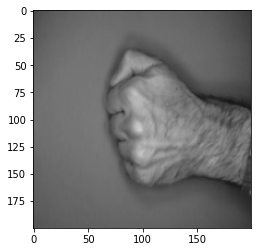

In [ ]:
import numpy as np
import cv2
import os
from google.colab import files
from keras.preprocessing import image
from keras.models import model_from_json
import matplotlib.pyplot as plt
%matplotlib inline

def get_load_image(path, normalization):
  img = image.load_img(path, target_size=(200,200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x /= 255
  return np.vstack([x])

def get_processed_image(img):
  resized_image = cv2.resize(img, (200, 200))
  converted_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
  grayscaled_image = cv2.cvtColor(converted_image, cv2.COLOR_RGB2GRAY)
  return grayscaled_image

save_temp_path = '/tmp/processed_image.png'
weight_model_path = "/tmp/saved_model/weight_model.h5"
model_path = "/tmp/saved_model/model.json"

json_model_fd = open(model_path, "r")
model = model_from_json(json_model_fd.read())
model.load_weights(weight_model_path)
uploaded = files.upload()

for fn in uploaded.keys():
  current_image = image.load_img(fn)
  int8_image = np.uint8(current_image)
  processed_image = get_processed_image(int8_image)

  cv2.imwrite(save_temp_path, processed_image)
  loaded_image = get_load_image(save_temp_path, 255)
 
  classes = model.predict(loaded_image, batch_size=32)
  loaded_image_dimension = (loaded_image.shape[1], loaded_image.shape[2], loaded_image.shape[3])
  reshaped_loaded_image = loaded_image.reshape(loaded_image_dimension)
  plt.imshow(reshaped_loaded_image)
  print(fn)

  result = np.argmax(classes)
  if (result == 0):
    print("Paper")
  elif (result == 1):
    print("Rock")
  elif (result == 2):
    print("Scissors")
  else:
    print("Cannot recognize the image")
  os.remove(save_temp_path)

In [ ]:
def delete_contents_path():
  remove_path = "/content/"
  for file in os.listdir(remove_path):
    if file.endswith(".png") or file.endswith(".jpg"):
      os.remove(remove_path + file)
delete_contents_path()
print("Successfully delete all images in contents directory!")
print("Make sure you clean the data in the contents directory after predicting models!")

Successfully delete all images in contents directory!
Make sure you clean the data in the contents directory after predicting models!
